In [1]:
import sys
sys.path.append('./scripts')

In [2]:
sys.version

'3.5.1 |Continuum Analytics, Inc.| (default, Dec  7 2015, 11:24:55) \n[GCC 4.2.1 (Apple Inc. build 5577)]'

In [4]:
import numpy as np

In [8]:
import sklearn
from IPython.display import Image 
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
clf = tree.DecisionTreeRegressor()
import tree_to_dict
from sklearn.externals import joblib

%matplotlib inline


/Users/wabbit/anaconda2/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/wabbit/anaconda2/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [9]:
np.loadtxt('../data/Ht.txt',skiprows=0, dtype=np.float64)

array([[ -2.81467040e-07,  -2.34740700e-07,  -2.09770750e-07, ...,
         -1.03084960e-07,  -8.31573740e-08,  -7.13508260e-08],
       [ -3.16907890e-07,  -2.75000420e-07,  -2.47578670e-07, ...,
         -1.17969640e-07,  -1.00952460e-07,  -9.04247490e-08],
       [ -3.38413540e-07,  -3.15388320e-07,  -3.05160400e-07, ...,
         -1.54530500e-07,  -1.36889770e-07,  -1.25013000e-07],
       ..., 
       [ -5.69642000e-07,  -5.58196580e-07,  -5.38326900e-07, ...,
         -2.09608030e-07,  -2.10239930e-07,  -1.95144070e-07],
       [ -5.87961440e-07,  -5.74981360e-07,  -5.34893270e-07, ...,
         -1.52148900e-07,  -1.56362660e-07,  -1.43316290e-07],
       [ -6.00122410e-07,  -5.87407560e-07,  -5.40756450e-07, ...,
         -1.16781640e-07,  -1.01914790e-07,  -8.63592080e-08]])

In [10]:
Ht = np.loadtxt('../data/Ht.txt',skiprows=0, dtype=np.float64)
Po = np.loadtxt('../data/Po.txt',skiprows=0, dtype=np.float64)
Ph = np.loadtxt('../data/Ph.txt',skiprows=0, dtype=np.float64)
Am = np.loadtxt('../data/Am.txt',skiprows=0, dtype=np.float64)
Pl = np.loadtxt('../data/Pl.txt',skiprows=0, dtype=np.float64)
Ht2 = np.loadtxt('../data/Height.txt',skiprows=0, dtype=np.float64)
Po2 = np.loadtxt('../data/Potential.txt',skiprows=0, dtype=np.float64)
Ph2 = np.loadtxt('../data/Phase.txt',skiprows=0, dtype=np.float64)
Am2 = np.loadtxt('../data/Amplitude.txt',skiprows=0, dtype=np.float64)
Pl2 = np.loadtxt('../data/Photoluminescence.txt',skiprows=0, dtype=np.float64)

In [11]:
# flatten the images
Ht_flat = Ht.flatten()
Po_flat = Po.flatten()
Ph_flat = Ph.flatten()
Am_flat = Am.flatten()
Pl_flat = Pl.flatten()
Ht2_flat = Ht2.flatten()
Po2_flat = Po2.flatten()
Ph2_flat = Ph2.flatten()
Am2_flat = Am2.flatten()
Pl2_flat = Pl2.flatten()

In [12]:
X = [Ht_flat, Po_flat, Ph_flat, Am_flat]
X = np.array(X).T
Y = np.array(Pl_flat).T
print(X.shape)
print(Y.shape)
Y

(65536, 4)
(65536,)


array([ 3201.,  3166.,  3208., ...,  3810.,  4895.,  7214.])

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)
clf = DecisionTreeRegressor(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [14]:
metrics.mean_squared_error(ytest, ypred)

133559312.90712005

In [15]:
print(clf)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [16]:
# We can export to a graphviz file, if we want to: 
with open("./results/afm_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    
# Note that the sklearn tutorial uses pydot to turn .dot into .pdf; 
# It isn't supported in Python 3.  
# Instead figure out how to do it with https://pypi.python.org/pypi/graphviz, 
# or just take the .dot straight into d3 as Matt showed. 

## Demo of tree depth v.s. trees in the forrest

In [17]:
Xtrain = np.array([Ht2_flat[0:31625], Po2_flat[0:31625], Ph2_flat[0:31625], Am2_flat[0:31625]]).T
Xtest = np.array([Ht2_flat[31625:], Po2_flat[31625:], Ph2_flat[31625:], Am2_flat[31625:]]).T
Ytrain = np.array(Pl2_flat[0:31625])
Ytest = np.array(Pl2_flat[31625:])

We want these trees to come out in a format like:

In [18]:
clf_forest = RandomForestRegressor(max_depth=3, 
                                   n_estimators=1, 
                                   bootstrap=True)
clf_forest.fit(Xtrain, Ytrain)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [19]:
clf_forest[0]

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=2057341662, splitter='best')

In [16]:
# proof of principle test of prediction:
clf_forest[0].predict([1, 1, 1, 1])

/Users/janet/miniconda3/envs/d3_tree/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.18559987])

## Now run Wesley's awesome loop:

x: 625.0


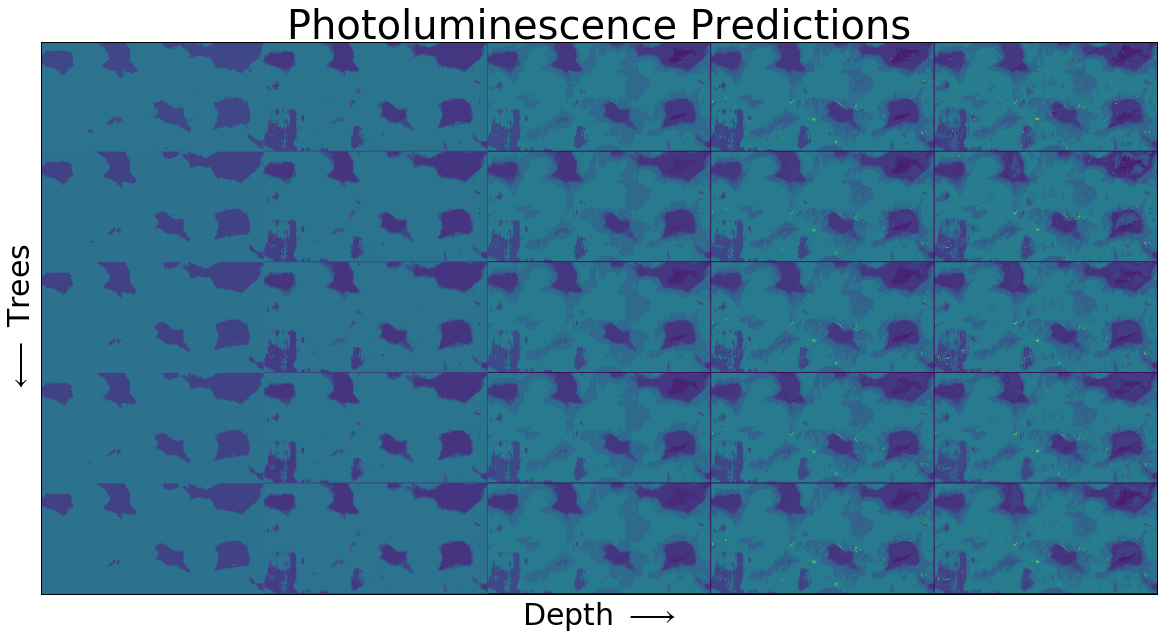

In [17]:
depths = 5
trees = 5
x = Ht2.shape[0]/2*trees
print("x: {}".format(x))
x = int(x)
y = Ht2.shape[1]
k=0
prediction = []

for q in range(1,depths+1):
    for r in range(1,trees+1):
        clf = RandomForestRegressor(max_depth=q, n_estimators=r, bootstrap=True)
        clf.fit(Xtrain, Ytrain)
        hold = clf.predict(Xtest)
        #print(metrics.mean_squared_error(Ytest, hold))
        prediction.append(hold)
        k = k + 1
        for s in range(r):
            # Use Janet's wrapper to save the tree as json:
            tree_to_dict.save_tree_as_dict(
                clf.estimators_[s].tree_, # JM added .tree_ 5/30/2016
                # training data: `X = [Ht_flat, Po_flat, Ph_flat, Am_flat]`
                # 160604 update names, which get used as node labels fr D3 tree
                feature_names = ['Height', 'Potential', 'Phase', 'Amplitude'],
                #feature_names=['Ht2_flat', 'Po2_flat', 
                #               'Ph2_flat', 'Am2_flat'],
            label_names='photoluminescence', 
            save_path='./results/%s_depth_%s_trees_%s_estimator.json'\
            % (q,r,(s+1)), node_index=0)

k=0
merge = (np.array(prediction).flatten())
Pl_predict = np.zeros((x,y*depths))
for l in range(depths):
    for i in range(x):
        for j in range (y):
            Pl_predict[i,j+(l*y)] = merge[k]
            k = k + 1

fig = plt.figure(figsize=(20,10))
pl_ax = fig.add_subplot(1,1,1)
pl_ax.imshow(Pl_predict, cmap='viridis')
pl_ax.set_title('Photoluminescence Predictions', size=40)
pl_ax.set_ylabel('$\longleftarrow$ Trees', size=30)
pl_ax.set_xlabel('Depth $\longrightarrow$', size=30)
pl_ax.axes.get_xaxis().set_ticks([])
pl_ax.axes.get_yaxis().set_ticks([])

fig.savefig(filename='afm_depth', bbox_inches='tight')

#Use this loop to create the predicted images

In [25]:
merge.shape

(790625,)

x: 625.0


[]

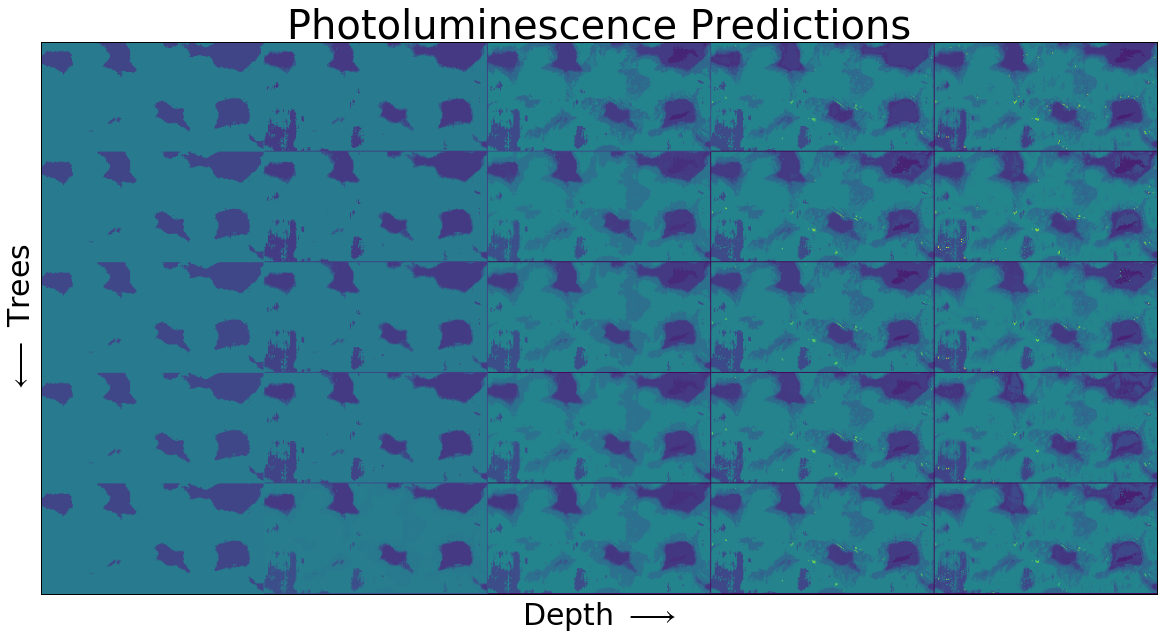

In [21]:
depths = 5
trees = 5
x = Ht2.shape[0]/2*trees
print("x: {}".format(x))
x = int(x)
y = Ht2.shape[1]
k=0
prediction = []

for q in range(1,depths+1):
    for r in range(1,trees+1):
        clf = RandomForestRegressor(max_depth=q, n_estimators=r, bootstrap=True)
        clf.fit(Xtrain, Ytrain)
        hold = clf.predict(Xtest)
        #print(metrics.mean_squared_error(Ytest, hold))
        prediction.append(hold)
        k = k + 1
        #for s in range(r):
            # Use Janet's wrapper to save the tree as json:
            # tree_to_dict.save_tree_as_dict(
             #    clf.estimators_[s].tree_, # JM added .tree_ 5/30/2016
                # training data: `X = [Ht_flat, Po_flat, Ph_flat, Am_flat]`
                # 160604 update names, which get used as node labels fr D3 tree
                # feature_names = ['Height', 'Potential', 'Phase', 'Amplitude'],
                # feature_names=['Ht2_flat', 'Po2_flat', 
                #               'Ph2_flat', 'Am2_flat'],
            #label_names='photoluminescence', 
            #save_path='./results/%s_depth_%s_trees_%s_estimator.json'\
            #% (q,r,(s+1)), node_index=0)

k=0
merge = (np.array(prediction).flatten())
Pl_predict = np.zeros((x,y*depths))
for l in range(depths):
    for i in range(x):
        for j in range (y):
            Pl_predict[i,j+(l*y)] = merge[k]
            k = k + 1
            np.savetxt('../data/Ht.txt',skiprows=0, dtype=np.float64)

fig = plt.figure(figsize=(20,10))
pl_ax = fig.add_subplot(1,1,1)
pl_ax.imshow(Pl_predict, cmap='viridis')
pl_ax.set_title('Photoluminescence Predictions', size=40)
pl_ax.set_ylabel('$\longleftarrow$ Trees', size=30)
pl_ax.set_xlabel('Depth $\longrightarrow$', size=30)
pl_ax.axes.get_xaxis().set_ticks([])
pl_ax.axes.get_yaxis().set_ticks([])

#fig.savefig(filename='afm_depth', bbox_inches='tight')

/Users/wabbit/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


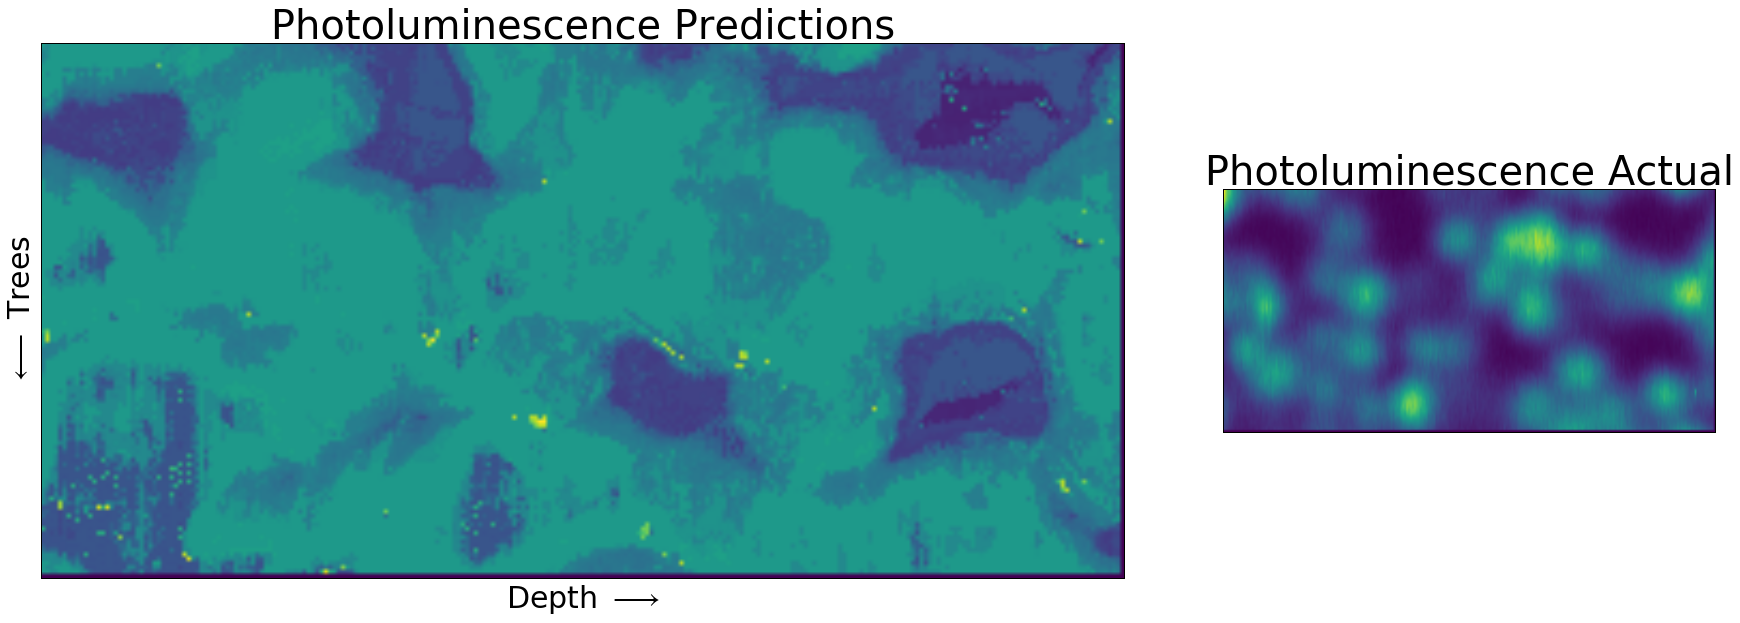

In [26]:
depths = 5
trees = 5
x = Ht2.shape[0]/2
x = int(x)  # JM 5/29/2016
y = Ht2.shape[1]
k=0
merge = (np.array(prediction).flatten())
for l in range(depths):
    for m in range(trees):
        Pl_predict = np.zeros((x,y))
        for i in range(x):
            for j in range (y):
                Pl_predict[i,j] = merge[k]
                k = k + 1
        np.savetxt('%s_depth_%s_trees' % (l,m), Pl_predict)        
        

fig = plt.figure(figsize=(30,10))
pl_ax = fig.add_subplot(1,3,(1,2))
pl_ax.imshow(Pl_predict, cmap='viridis')
pl_ax.set_title('Photoluminescence Predictions', size=40)
pl_ax.set_ylabel('$\longleftarrow$ Trees', size=30)
pl_ax.set_xlabel('Depth $\longrightarrow$', size=30)
pl_ax.axes.get_xaxis().set_ticks([])
pl_ax.axes.get_yaxis().set_ticks([])
pl_ax2 = fig.add_subplot(1,3,3)
pl_ax2.set_title('Photoluminescence Actual', size=40)
pl_ax2.imshow(Pl2[Pl2.shape[0]/2:,:], cmap='viridis')
pl_ax2.axes.get_xaxis().set_ticks([])
pl_ax2.axes.get_yaxis().set_ticks([])
fig.savefig(filename='afm_depth', bbox_inches='tight')

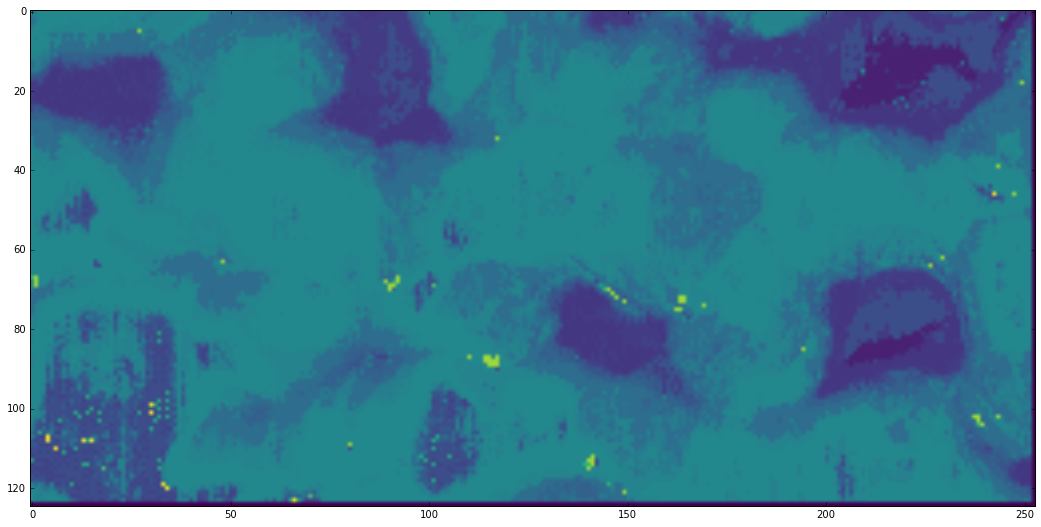

In [34]:
Ht = np.loadtxt('4_depth_1_trees',skiprows=0, dtype=np.float64)
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.imshow(Ht, cmap='viridis')